In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

file_path = 'North_America_MOM_Factor_Daily.csv'

def read(file_path):
  df = pd.read_csv(file_path, skiprows=7, header=None)

  dates = df[0].tolist()
  dates = np.array(dates)

  date_format = "%Y%m%d"
  dates = pd.to_datetime(dates, format=date_format)

  dates = dates[126:]

  returns = df[1].tolist()
  returns = np.array(returns)/100

  return returns, dates

returns, dates = read(file_path)


In [ ]:
def momentum(returns):
  NAV = [1]

  for i in range(len(returns[127:])):
    NAV.append(NAV[i]*(1+returns[127+i]))

  return NAV

In [ ]:
def adjusted_momentum(returns, vol_target):
  adjusted_returns = []
  var_prediction = []
  var_target=(vol_target**0.5)/255
  NAV = [1]

  for i in range(len(returns[127:])):
    var_prediction.append(np.sum(returns[i:i+127]**2)*21/126)
    adjusted_returns.append(returns[127+i]*var_target/var_prediction[i])
    NAV.append(NAV[i]*(1+adjusted_returns[-1]))

  var_prediction = np.array(var_prediction)
  adjusted_returns = np.array(adjusted_returns)

  return NAV, adjusted_returns, var_prediction, var_target

In [ ]:
def adjusted_momentum_tc(returns, vol_target, tc=0.002):
  adjusted_returns_tc = []
  var_prediction = []
  var_target=(vol_target**0.5)/255
  NAV_tc = [1]
  weight_multiplier = 0


  for i in range(len(returns[127:])):
    var_prediction.append(np.sum(returns[i:i+127]**2)*21/126)
    Portfolio_Rebalance = np.abs(var_target/var_prediction[i] - weight_multiplier)
    weight_multiplier = var_target/var_prediction[i]
    adjusted_returns_tc.append(returns[127+i]*weight_multiplier)
    NAV_tc.append(NAV_tc[i]*(1+ adjusted_returns_tc[-1] - Portfolio_Rebalance*tc))

  var_prediction = np.array(var_prediction)
  adjusted_returns_tc = np.array(adjusted_returns_tc)

  return NAV_tc, adjusted_returns_tc, var_prediction, var_target

In [ ]:
def plot(NAV, NAV_adj, NAV_tc, returns, adj_returns, var_target, var_prediction, dates):

  plt.figure()
  plt.plot(returns, label="returns")
  plt.plot(adj_returns, label="adjusted returns")
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(dates,NAV, label="NAV Momentum")
  plt.plot(dates, NAV_adj, label="NAV Momentum Adjusted")
  plt.plot(dates, NAV_tc, label="NAV Momentum Adjusted with Transaction Costs")
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(dates[1:],var_prediction, label="predicted variance")
  plt.axhline(var_target, label="target variance")
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(dates[1:],np.log2(var_target/var_prediction), label = "Portfolio Size Multiplier")
  plt.axhline(0)
  plt.plot(dates,NAV, label="NAV Momentum")
  plt.legend()
  plt.show()

  plt.figure()
  fig, ax1 = plt.subplots()
  ax1.set_ylabel("returns", color='tab:red')
  ax1.plot(returns, color='tab:red')
  ax2 = ax1.twinx()
  ax2.set_ylabel('weights', color='tab:blue')
  ax2.plot(var_target/var_prediction, color='tab:blue')
  fig.tight_layout()
  plt.show()

  plt.figure()
  fig2, ax3 = plt.subplots()
  ax3.set_ylabel("returns", color='tab:red')
  ax3.plot(returns, color='tab:red')
  ax4 = ax3.twinx()
  ax4.set_ylabel('weights', color='tab:blue')
  ax4.plot(np.log2(var_target/var_prediction), color='tab:blue')
  fig2.tight_layout()
  plt.show()

In [ ]:
def summary_statistics(returns, adjusted_returns, var_target, var_prediction, file_path, NAV, NAV_adj):
  cum_returns = NAV[-1]-1
  cum_adj_returns = NAV_adj[-1]-1
  avg_returns = (1 + cum_returns) ** (255/len(returns))-1
  avg_adj_returns = (1 + cum_adj_returns) ** (255/len(adjusted_returns))-1
  vol_returns = np.std(returns)
  vol_adj_returns = np.std(adjusted_returns)
  avg_vol_returns = vol_returns * np.sqrt(255)
  avg_vol_adj_returns = vol_adj_returns * np.sqrt(255)
  max_drawdown = np.min(returns)
  max_drawdown_adjusted = np.min(adjusted_returns)
  kurtosis_mom = kurtosis(returns)
  kurtosis_adj = kurtosis(adjusted_returns)

  print("Statistics report: ", file_path, "\n", avg_returns, ": Average Yearly Returns \n", avg_adj_returns,": Average Yearly Adjusted Returns \n", avg_vol_returns,  ": Average Yearly Volatility \n", avg_vol_adj_returns, ": Average Yearly Adjusted Volatility \n", cum_returns, ": Cumulative Returns \n", cum_adj_returns, ": Cumulative Adjusted Returns \n", vol_returns, ": Volatility \n", vol_adj_returns, ": AdjustedVolatility \n", kurtosis_mom,  ": Kurtosis \n", kurtosis_adj,  ": Kurtosis Adjusted \n", max_drawdown,  ": Max_Drawdown \n", max_drawdown_adjusted ,": Max_Drawdown Adjusted \n")

  return cum_returns, cum_adj_returns, avg_returns, avg_adj_returns, avg_vol_returns, avg_vol_adj_returns, max_drawdown,  max_drawdown_adjusted, kurtosis_mom, kurtosis_adj


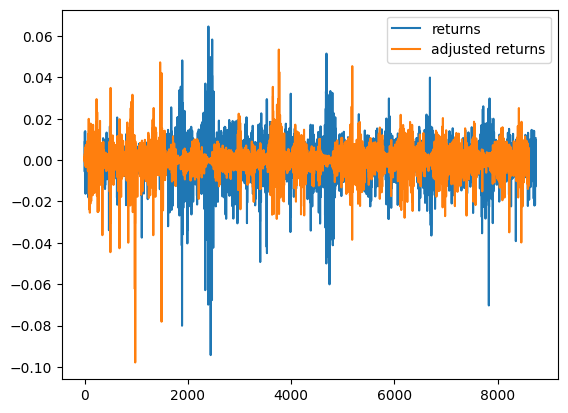

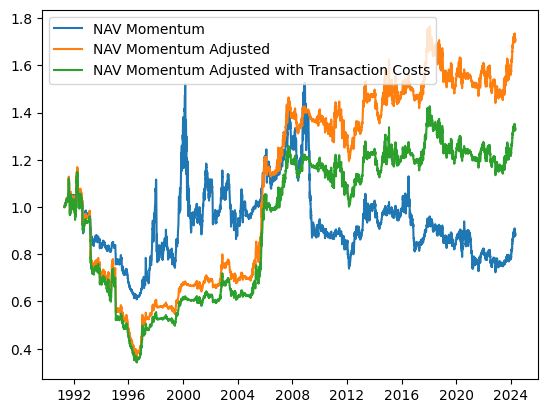

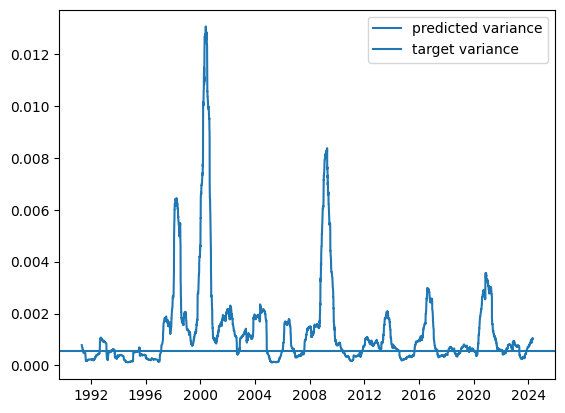

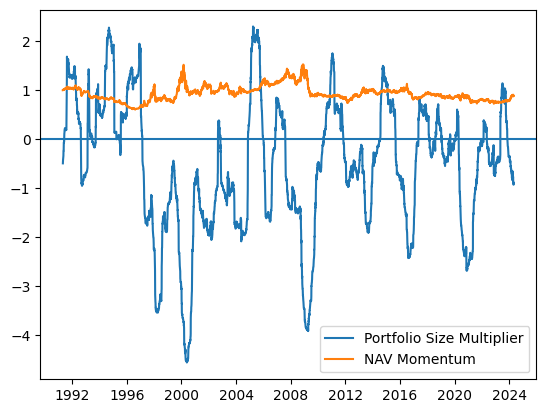

<Figure size 640x480 with 0 Axes>

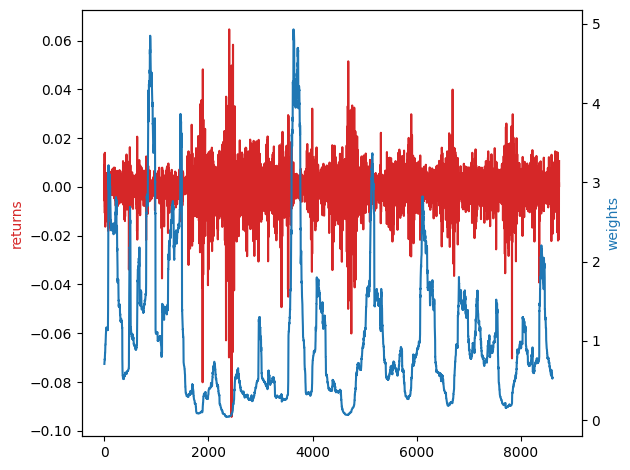

<Figure size 640x480 with 0 Axes>

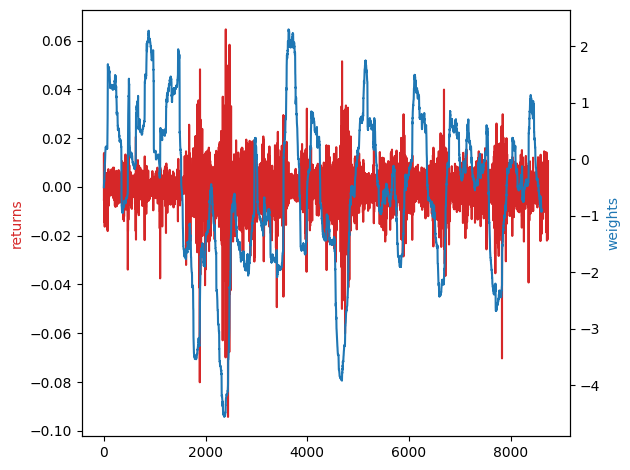

Statistics report:  North_America_MOM_Factor_Daily.csv 
 -0.003455446187145328 : Average Yearly Returns 
 0.008550755363134988 : Average Yearly Adjusted Returns 
 0.1271403845175939 : Average Yearly Volatility 
 0.0943774069341381 : Average Yearly Adjusted Volatility 
 -0.11183531294313298 : Cumulative Returns 
 0.33307242397465076 : Cumulative Adjusted Returns 
 0.007961839716282356 : Volatility 
 0.00591014247517853 : AdjustedVolatility 
 11.476406287112619 : Kurtosis 
 20.77986180337355 : Kurtosis Adjusted 
 -0.0943 : Max_Drawdown 
 -0.09787098591441078 : Max_Drawdown Adjusted 



In [ ]:
NAV = momentum(returns)
NAV_adj, adjusted_returns, var_prediction, var_target = adjusted_momentum(returns, 0.02)
NAV_tc, adjusted_returns_tc, var_prediction_tc, var_target_tc = adjusted_momentum_tc(returns, 0.02)
plot(NAV, NAV_adj, NAV_tc, returns, adjusted_returns_tc, var_target_tc, var_prediction_tc, dates)
summary_statistics(returns, adjusted_returns, var_target, var_prediction,'North_America_MOM_Factor_Daily.csv', NAV, NAV_tc)

# print(np.sum(np.abs(np.diff(var_target/var_prediction)))*0.0003)

In [95]:
file_paths = ['North_America_MOM_Factor_Daily.csv', "Asia_Pacific_ex_Japan_MOM_Factor_Daily.csv", "Developed_ex_US_MOM_Factor_Daily.csv", "Developed_MOM_Factor_Daily.csv", "Europe_MOM_Factor_Daily.csv", "Japan_MOM_Factor_Daily.csv"]
target_vols = [0.02, 0.02, 0.006, 0.006, 0.007, 0.03]
cum_returns = []
cum_adj_returns = []
avg_returns = []
avg_adj_returns = []
vol_returns = []
vol_adj_returns = []
max_drawdown = []
max_drawdown_adjusted = []
kurtosis_mom = []
kurtosis_adj = []


for i, file_path in enumerate(file_paths):
  print(file_path)
  returns, dates = read(file_path)
  NAV = momentum(returns)
  NAV_adj, adjusted_returns, var_prediction, var_target = adjusted_momentum(returns, target_vols[i])
  NAV_tc, adjusted_returns_tc, var_prediction_tc, var_target_tc = adjusted_momentum_tc(returns, target_vols[i])
  plot(NAV, NAV_adj, NAV_tc, returns, adjusted_returns_tc, var_target_tc, var_prediction_tc, dates)
  a,b,c,d,e,f,g,h,i,j = summary_statistics(returns, adjusted_returns_tc, var_target, var_prediction,'North_America_MOM_Factor_Daily.csv', NAV, NAV_tc)
  cum_returns.append(a)
  cum_adj_returns.append(b)
  avg_returns.append(c)
  avg_adj_returns.append(d)
  vol_returns.append(e)
  vol_adj_returns.append(f)
  max_drawdown.append(g)
  max_drawdown_adjusted.append(h)
  kurtosis_mom.append(i)
  kurtosis_adj.append(j)

df = pd.DataFrame(list(zip(cum_returns, cum_adj_returns,avg_returns,avg_adj_returns,vol_returns,vol_adj_returns,max_drawdown,max_drawdown_adjusted,kurtosis_mom,kurtosis_adj)))
df.to_excel("output.xlsx", index = False)



Output hidden; open in https://colab.research.google.com to view.